In [22]:
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import warnings
warnings.filterwarnings('ignore')


In [23]:
df_prep = pd.read_csv('C:/Users/afshi/OneDrive/Documents/unsuper/final/final/clean_data_xlstat.csv')
df_prep = df_prep.drop(columns=['Unnamed: 0'])

In [24]:
objcols = df_prep.select_dtypes(['object']).columns


In [25]:
df_prep[objcols] = df_prep[objcols].astype('category')

In [26]:
# apply OrdinalEncoder for categorial columns
cat_cols = df_prep.select_dtypes(['category']).columns
# Creating an instance of OrdinalEncoder
enc = OrdinalEncoder()
# Assigning numerical values and storing it
enc.fit(df_prep[cat_cols])
df_prep[cat_cols] = enc.transform(df_prep[cat_cols])


In [27]:
df_prep.head()

,Total Employees,Tech/No Tech,Tech Role,MH Benefits,Awareness of Company MH Care,Formal MH Discussion,MH Resources,Anonymity,Medical Leave,MH Negative Impact,...,Professional Diagnosis,Sought Treatment,MH Interference Treatment,MH Interference No Treatment,Age,Gender,Country,State,Position,Remote
0,3,1.0,1.0,2.0,0.0,1.0,1.0,0.0,1,1.0,...,1.0,0,1.0,1.0,3,1.0,5.0,9,0.0,2.0
1,2,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2,1.0,...,1.0,1,3.0,4.0,2,1.0,6.0,5,87.0,1.0
2,2,1.0,1.0,1.0,0.0,1.0,1.0,0.0,3,0.0,...,0.0,1,1.0,1.0,3,1.0,5.0,9,0.0,0.0
3,2,0.0,0.0,3.0,2.0,1.0,1.0,1.0,3,2.0,...,1.0,1,4.0,4.0,4,0.0,6.0,5,64.0,2.0
4,6,1.0,1.0,3.0,0.0,1.0,2.0,2.0,2,2.0,...,0.0,1,1.0,2.0,4,1.0,5.0,9,49.0,2.0


In [28]:
# Splitting the data : training and test

y = df_prep.loc[:, df_prep.columns == 'Sought Treatment'].values.ravel()
X = df_prep.loc[:, df_prep.columns != 'Sought Treatment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

X_training_new_name = SelectKBest(chi2, k=7).fit(X_train, y_train) 

In [29]:
# application of chi2 to get important fetures

In [30]:
selector = SelectKBest(f_classif, k = 7)
#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
X_new = selector.fit_transform(X, y)
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
names_scores 

[('Sharing w/ Family/Friends', 63.83371180240162),
 ('MH Family History', 67.31491608717337),
 ('Past Mental Disorder', 451.69128846963804),
 ('Current Mental Disorder', 157.8983445625859),
 ('Professional Diagnosis', 1362.5473758381222),
 ('MH Interference Treatment', 344.4308357773588),
 ('MH Interference No Treatment', 181.44785335423848)]

In [ ]:
# application of correlation heatmap to see important feature 

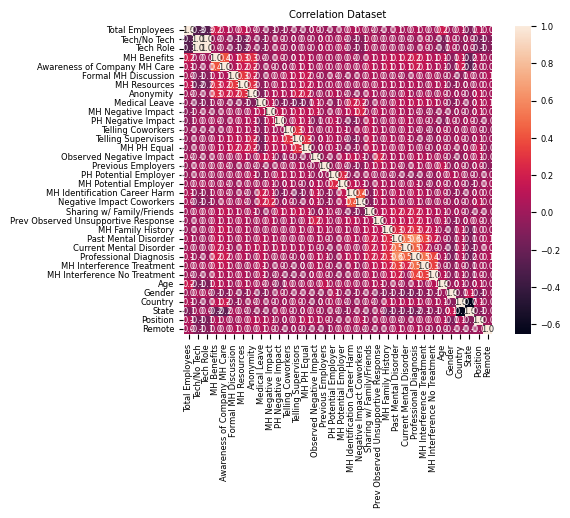

In [31]:
# Convert feature matrix into DataFrame
df_v1 = pd.DataFrame(X)
# Create correlation matrix
corr_matrix = df_v1.corr()
# Create correlation heatmap
plt.rcParams.update({'font.size': 6,})
# Create correlation heatmap
plt.figure(figsize=(6,4))
plt.title('Correlation Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.1f', linecolor='black')
a.set_xticklabels(a.get_xticklabels())
a.set_yticklabels(a.get_yticklabels())
plt.show()

Features to drop : ['Tech Role']


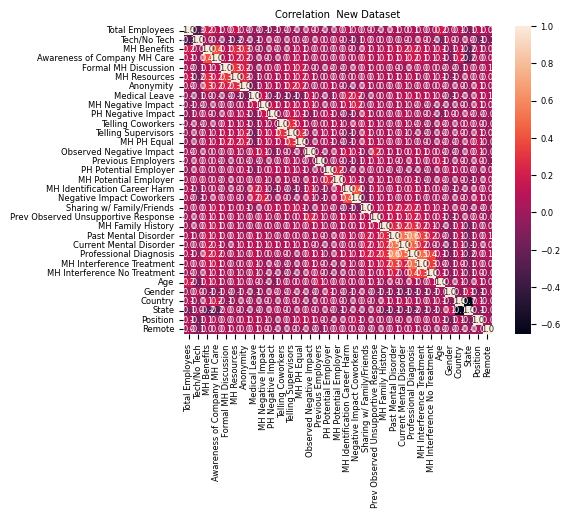

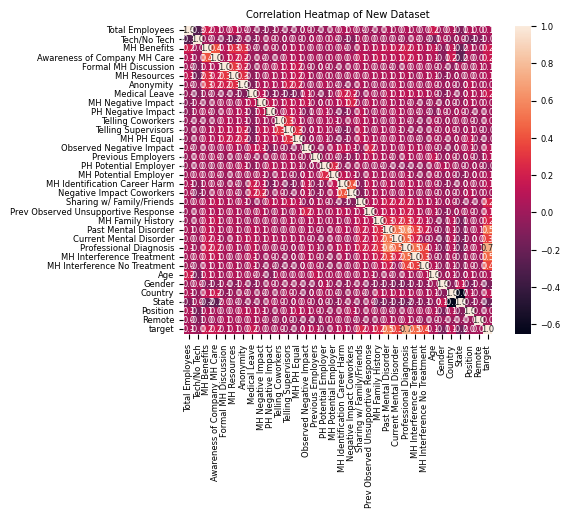

Features to keep : 

Sharing w/ Family/Friends       0.229891
MH Family History               0.235737
Past Mental Disorder            0.532043
Current Mental Disorder         0.348257
Professional Diagnosis          0.737289
MH Interference Treatment       0.481046
MH Interference No Treatment    0.369994
target                          1.000000
Name: target, dtype: float64


In [32]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print("Features to drop :", to_drop)
df_v1_new = df_v1.drop(to_drop, axis=1)
# Create correlation matrix
corr_matrix_new = df_v1_new.corr()
# Create correlation heatmap
plt.rcParams.update({'font.size': 6,})
# Create correlation heatmap
plt.figure(figsize=(6,4))
plt.title('Correlation  New Dataset')
a = sns.heatmap(corr_matrix_new, square=True, annot=True, fmt='.1f',
linecolor='black')
a.set_xticklabels(a.get_xticklabels())
a.set_yticklabels(a.get_yticklabels())
plt.show()
# Concatenate dataframes (X and the target y called diagnosis)
df_y = pd.DataFrame(y,columns = ["target"])
df_all = pd.concat([df_v1_new, df_y], axis=1)
#Correlation with target variable
cor = df_all.corr()
cor_target = abs(cor["target"])
# Create correlation heatmap
plt.rcParams.update({'font.size': 6,})
# Create correlation heatmap
plt.figure(figsize=(6,4))
plt.title('Correlation Heatmap of New Dataset')
a = sns.heatmap(cor, square=True, annot=True, fmt='.1f', linecolor='black')
a.set_xticklabels(a.get_xticklabels())
a.set_yticklabels(a.get_yticklabels())
plt.show()
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.20]
print("Features to keep : \n")
print(relevant_features)

In [ ]:
# both methods recognize same features

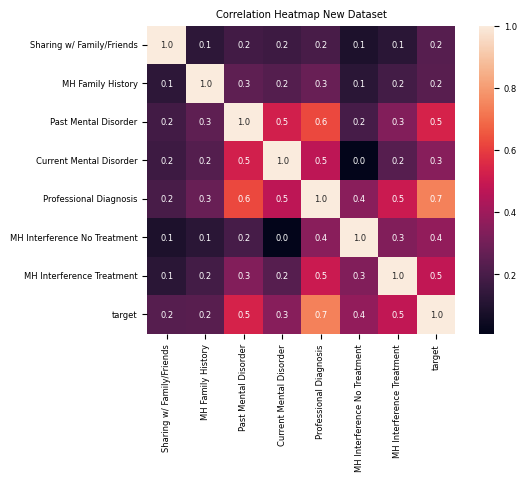

In [33]:
df_extract = df_all[['Sharing w/ Family/Friends',
'MH Family History','Past Mental Disorder','Current Mental Disorder','Professional Diagnosis','MH Interference No Treatment','MH Interference Treatment',
'target']].copy()
cor = df_extract.corr()
cor_target = abs(cor["target"])
plt.rcParams.update({'font.size': 6,})
# Create correlation heatmap
plt.figure(figsize=(6,4))
plt.title('Correlation Heatmap New Dataset')
a = sns.heatmap(cor, square=True, annot=True, fmt='.1f', linecolor='black')
a.set_xticklabels(a.get_xticklabels())
a.set_yticklabels(a.get_yticklabels())
plt.show()

In [34]:
# attemp to send data for xlstat and use original values
# XLSTAT will apply encoder, so i will send it, important features with categorical information

df_prep = pd.read_csv('C:/Users/afshi/OneDrive/Documents/unsuper/final/final/clean_data_xlstat.csv')
df_prep = df_prep.drop(columns=['Unnamed: 0'])

In [35]:


df_extract_xlstat = df_prep[['Sharing w/ Family/Friends','MH Family History','Past Mental Disorder','Current Mental Disorder',
'Professional Diagnosis','MH Interference No Treatment','MH Interference Treatment',
'Sought Treatment']].copy()

df_extract_xlstat['Sought Treatment'] = df_extract_xlstat['Sought Treatment'].map({0:'No',1:'Yes'})

objcols = df_extract_xlstat.select_dtypes(['object']).columns
df_extract_xlstat[objcols] = df_extract_xlstat[objcols].astype('category')
df_extract_xlstat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Sharing w/ Family/Friends     1146 non-null   category
 1   MH Family History             1146 non-null   category
 2   Past Mental Disorder          1146 non-null   category
 3   Current Mental Disorder       1146 non-null   category
 4   Professional Diagnosis        1146 non-null   category
 5   MH Interference No Treatment  1146 non-null   category
 6   MH Interference Treatment     1146 non-null   category
 7   Sought Treatment              1146 non-null   category
dtypes: category(8)
memory usage: 10.3 KB


In [36]:
df_extract_xlstat.head(5)

,Sharing w/ Family/Friends,MH Family History,Past Mental Disorder,Current Mental Disorder,Professional Diagnosis,MH Interference No Treatment,MH Interference Treatment,Sought Treatment
0,Somewhat open,No,Yes,No,Yes,Not applicable to me,Not applicable to me,No
1,Somewhat open,Yes,Yes,Yes,Yes,Sometimes,Rarely,Yes
2,Somewhat open,No,Maybe,No,No,Not applicable to me,Not applicable to me,Yes
3,Somewhat open,Yes,Yes,Yes,Yes,Sometimes,Sometimes,Yes
4,Somewhat open,No,No,Yes,No,Often,Not applicable to me,Yes


In [37]:
get= df_extract_xlstat['Sharing w/ Family/Friends'].unique().tolist()
print(get)

['Somewhat open', 'Not applicable to me (I do not have a mental illness)', 'Very open', 'Not open at all', 'Neutral', 'Somewhat not open']


In [38]:
df_extract_xlstat['Sharing w/ Family/Friends'] = df_extract_xlstat['Sharing w/ Family/Friends'].map({
'Somewhat open':'Somewhat',
'Somewhat not open':'Somewhat',
"Not applicable to me (I do not have a mental illness)":"No",
"Not open at all":"No",
"Neutral":"Maybe",
"Very open":"Open"})

In [39]:
df_extract_xlstat['Sharing w/ Family/Friends'].unique()
df_extract_xlstat['MH Family History'].unique()
df_extract_xlstat['MH Family History'] = df_extract_xlstat['MH Family History'].map({
'No':'No',
'Yes':'Yes',
"I don't know":"Maybe",
})
df_extract_xlstat['MH Family History'].unique()
df_extract_xlstat['Past Mental Disorder'].unique()

df_extract_xlstat['Current Mental Disorder'].unique()
df_extract_xlstat['MH Interference No Treatment'].unique()


['Not applicable to me', 'Sometimes', 'Often', 'Rarely', 'Never']
Categories (5, object): ['Never', 'Not applicable to me', 'Often', 'Rarely', 'Sometimes']

In [40]:
df_extract_xlstat['MH Interference No Treatment'] = df_extract_xlstat['MH Interference No Treatment'].map({
'Not applicable to me':'No',
'Sometimes':'Sometimes',
'Often':'Sometimes',
"Rarely":"No",
"Never":"No"})

In [41]:
df_extract_xlstat['MH Interference No Treatment'].unique()
df_extract_xlstat['MH Interference Treatment'].unique()

['Not applicable to me', 'Rarely', 'Sometimes', 'Never', 'Often']
Categories (5, object): ['Never', 'Not applicable to me', 'Often', 'Rarely', 'Sometimes']

In [42]:
df_extract_xlstat['MH Interference Treatment'] = df_extract_xlstat['MH Interference Treatment'].map({
'Not applicable to me':'No',
'Sometimes':'Sometimes',
'Often':'Sometimes',
"Rarely":"No",
"Never":"No"})


In [43]:
df_extract_xlstat.to_csv('C:/Users/afshi/OneDrive/Documents/unsuper/final/final/without_ordinal_encoding_0.2_edition.csv')

In [ ]:
# I use xlstat for analysis of MCA but also there is prince library. This is application of it on selected features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Sharing w/ Family/Friends     1146 non-null   category
 1   MH Family History             1146 non-null   category
 2   Past Mental Disorder          1146 non-null   category
 3   Current Mental Disorder       1146 non-null   category
 4   Professional Diagnosis        1146 non-null   category
 5   MH Interference No Treatment  1146 non-null   category
 6   MH Interference Treatment     1146 non-null   category
 7   Sought Treatment              1146 non-null   category
dtypes: category(8)
memory usage: 10.1 KB


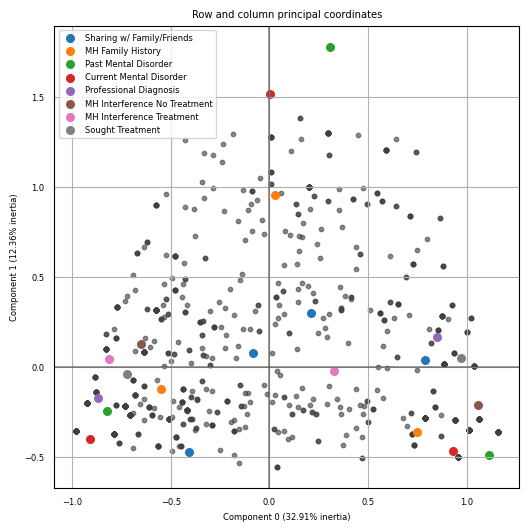

In [52]:
import prince
objcols = df_extract_xlstat.select_dtypes(['object']).columns
df_extract_xlstat[objcols] = df_extract_xlstat[objcols].astype('category')
df_extract_xlstat.info()
mca_cols = df_extract_xlstat.select_dtypes(['category']).columns
# instantiate MCA class
mca = prince.MCA(n_components = 2)
# get principal components
mca = mca.fit(df_extract_xlstat[mca_cols])
ax = mca.plot_coordinates(df_extract_xlstat[mca_cols])